# EDA

## 1. 数据正确性

In [5]:
import pandas as pd
DATA_PATH = 'G:/DataSets/kaggle/Elo Merchant Category Recommendation'
# easier_excel.desc_data不依赖于其余模块，可以单独下下来这个py文件来使用。集成只是为了更便于复用
from easier_excel.desc_data import DescData
from easier_excel.desc_data import plot_feature_distributions

In [ ]:
# 加载数据
train = pd.read_csv(f"{DATA_PATH}/train.csv")
test = pd.read_csv(f"{DATA_PATH}/test.csv")
print(f"Train data shape: {train.shape}, Test data shape: {test.shape}")

In [2]:
assert train['card_id'].nunique() == train['card_id'].shape[0]  # 训练集card_id唯一
assert test['card_id'].nunique() == test['card_id'].shape[0]  # 测试集card_id唯一
assert test['card_id'].nunique()+ train['card_id'].nunique()  == len(set(test['card_id'].values.tolist()+ train['card_id'].values.tolist()))  # card_id无重复

## 2. 缺失值

In [3]:

train_desc = DescData(train)
test_desc = DescData(test)
# 懒人描述
train_desc_auto = train_desc.auto_desc()
test_desc_auto = test_desc.auto_desc()
print(f"Train auto desc:\n{train_desc_auto}")
print(f"Test auto desc:\n{test_desc_auto}")

# 查看含有缺失值的列与缺失值数量
train_missing_info = train_desc.desc_missing_values()
test_missing_info = test_desc.desc_missing_values()
print(f"Train missing info:\n{train_missing_info}")
print(f"Test missing info:\n{test_missing_info}")

# 查看test有缺失值的那一行
test[test.isnull().values==True]  # 11578行

数据集的形状为：(201917, 6)
数据集的形状为：(123623, 5)
Train auto desc:
              Feature  n_unique  缺失值占比(%)  最大类别占比(%)     type
0  first_active_month        75       0.0   6.873121   object
1             card_id    201917       0.0   0.000495   object
2           feature_1         5       0.0  36.437249    int64
3           feature_2         3       0.0  44.197368    int64
4           feature_3         2       0.0  56.556902    int64
5              target    197110       0.0   1.093023  float64
Test auto desc:
              Feature  n_unique  缺失值占比(%)  最大类别占比(%)    type
0  first_active_month        75  0.000809   7.122461  object
1             card_id    123623  0.000000   0.000809  object
2           feature_1         5  0.000000  36.173689   int64
3           feature_2         3  0.000000  44.308098   int64
4           feature_3         2  0.000000  56.437718   int64
Train missing info:
无缺失值
Test missing info:
                    count      rate
first_active_month      1  0.000008


,first_active_month,card_id,feature_1,feature_2,feature_3
11578,NaN,C_ID_c27b4f80f7,5,2,1


## 3. 分布差异

分析的4个特征：['feature_2', 'feature_1', 'feature_3', 'first_active_month']

[Feature] feature_2 >>> [feature_2] JS Div=0.000005


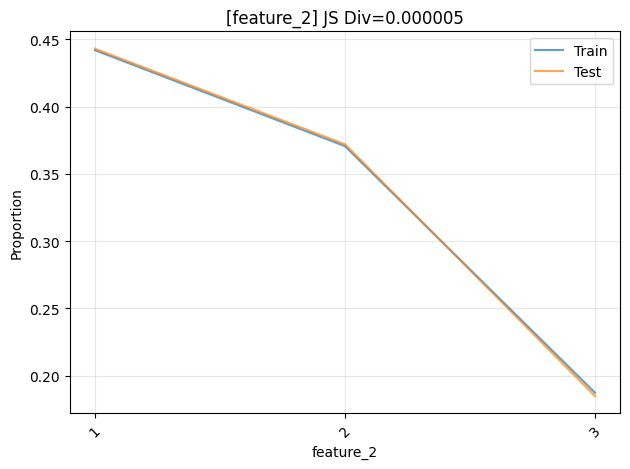


[Feature] feature_1 >>> [feature_1] JS Div=0.000006


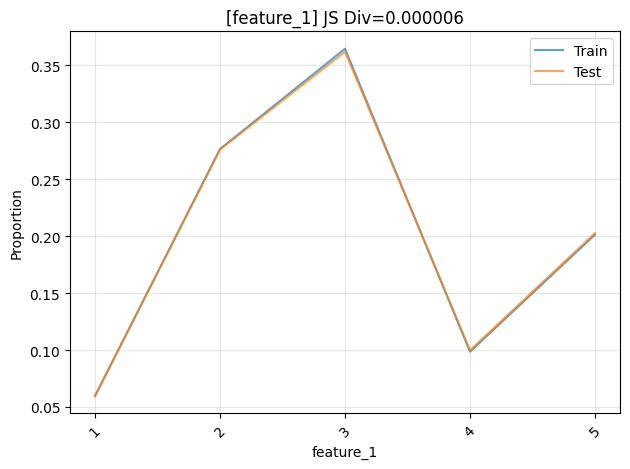


[Feature] feature_3 >>> [feature_3] JS Div=0.000001


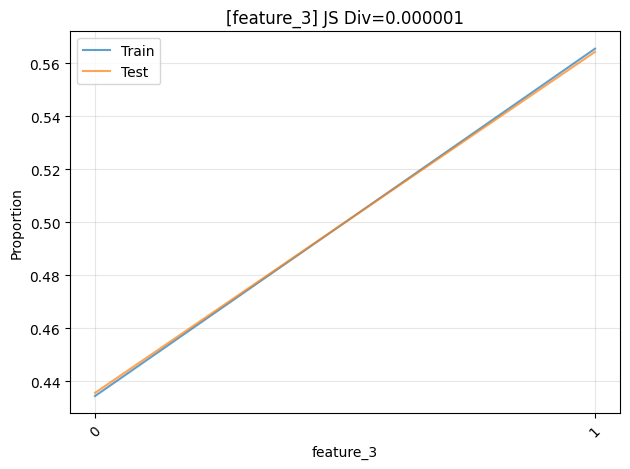


[Feature] first_active_month >>> [first_active_month] JS Div=0.000109


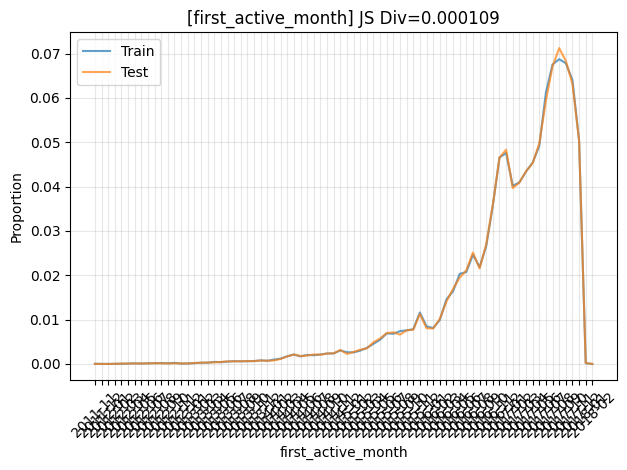

In [4]:

plot_feature_distributions(train, test, exclude_features=['card_id'])


## 4. 数据分布


[log] -------------------- 

正在分析表格：训练集
表格的形状：(201917, 6)

>>> 类别型字段（4 个）：['first_active_month', 'feature_1', 'feature_2', 'feature_3']
字段：first_active_month
first_active_month是类别型数据，共有75个不同的值
first_active_month
2017-09    13878
2017-10    13695
2017-08    13638
2017-11    12930
2017-07    12363
           ...  
2012-03       10
2011-11        8
2012-02        7
2011-12        2
2018-02        1
Name: count, Length: 75, dtype: int64
字段：feature_1
feature_1是类别型数据，共有5个不同的值
feature_1
3    73573
2    55797
5    40625
4    19885
1    12037
Name: count, dtype: int64
字段：feature_2
feature_2是类别型数据，共有3个不同的值
feature_2
1    89242
2    74839
3    37836
Name: count, dtype: int64
字段：feature_3
feature_3是类别型数据，共有2个不同的值
feature_3
1    114198
0     87719
Name: count, dtype: int64

[log] 正在绘制类别型字段的统计图...


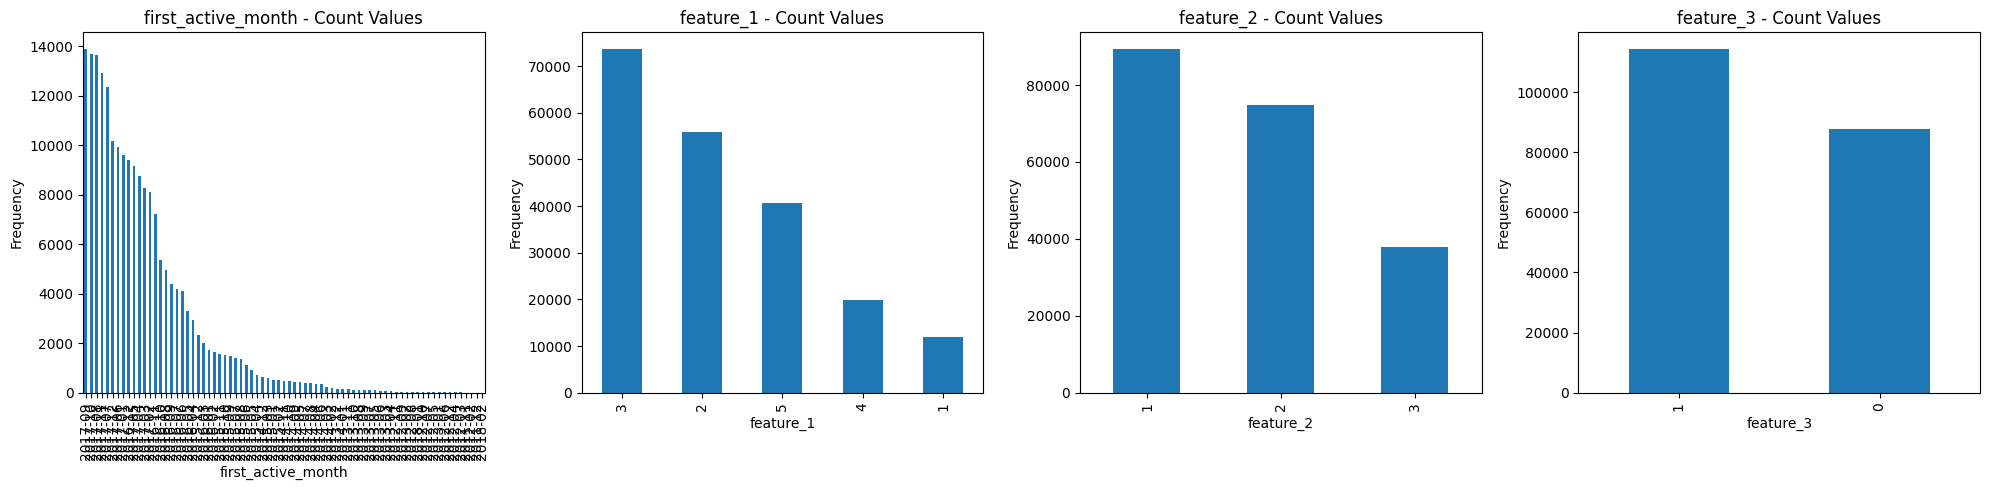


>>> 数值型字段（1 个）：['target']

字段：target
target是数值型数据，共有197110个不同的值
count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

[log] 正在绘制数值型字段的分布图...


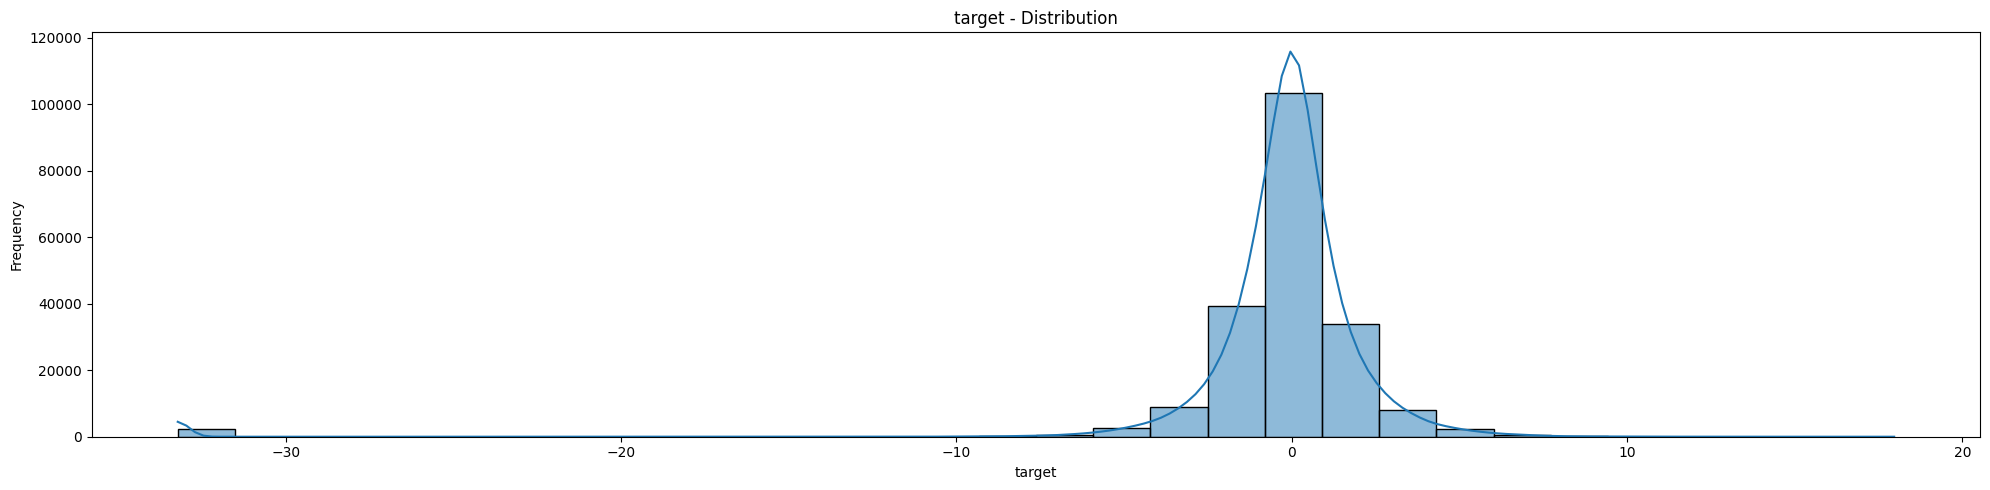


[log] -------------------- 

正在分析表格：测试集
表格的形状：(123623, 5)

>>> 类别型字段（4 个）：['first_active_month', 'feature_1', 'feature_2', 'feature_3']
字段：first_active_month
first_active_month是类别型数据，共有75个不同的值
first_active_month
2017-09    8805
2017-10    8451
2017-08    8299
2017-11    7807
2017-07    7344
           ... 
2012-03      10
2012-02       4
2011-11       3
2011-12       2
2012-01       1
Name: count, Length: 75, dtype: int64
字段：feature_1
feature_1是类别型数据，共有5个不同的值
feature_1
3    44719
2    34115
5    25051
4    12332
1     7406
Name: count, dtype: int64
字段：feature_2
feature_2是类别型数据，共有3个不同的值
feature_2
1    54775
2    45993
3    22855
Name: count, dtype: int64
字段：feature_3
feature_3是类别型数据，共有2个不同的值
feature_3
1    69770
0    53853
Name: count, dtype: int64

[log] 正在绘制类别型字段的统计图...


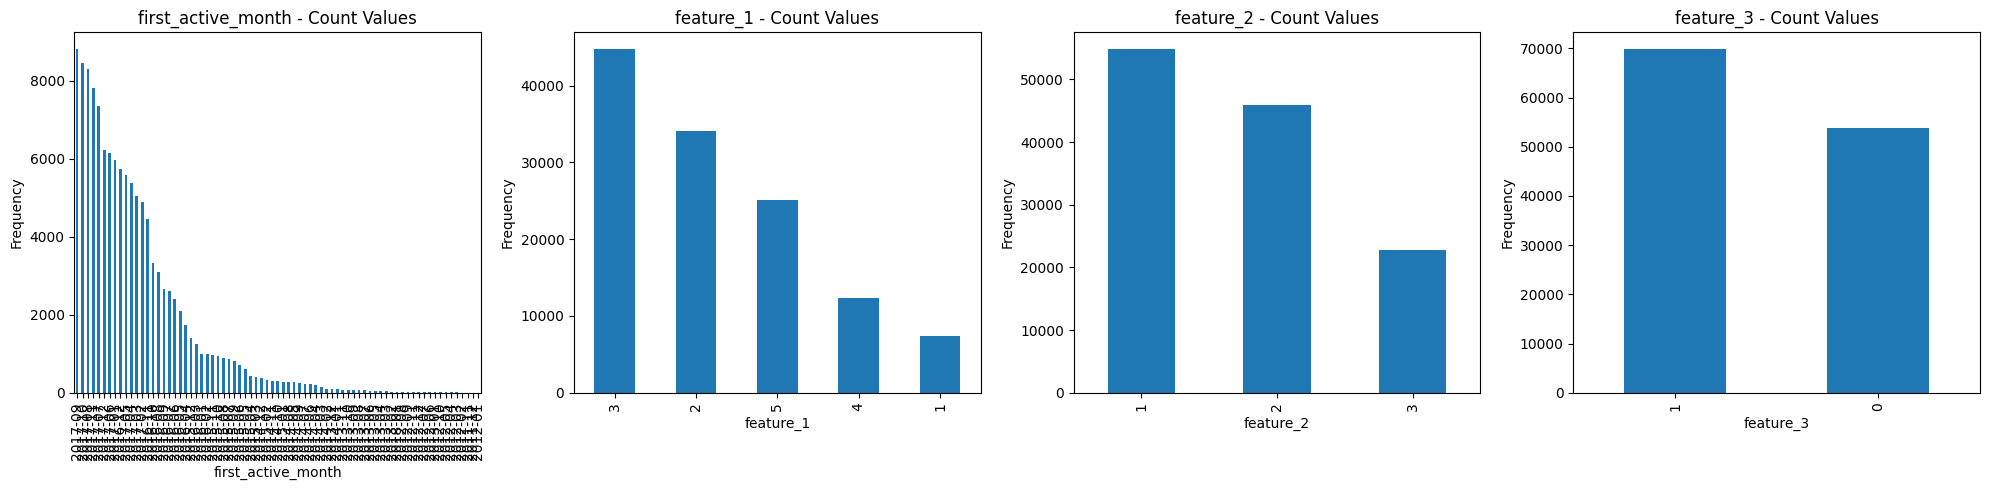


>>> 数值型字段（0 个）：[]


In [5]:
from easier_excel.desc_data import describe_and_visualize
describe_and_visualize(train, "训练集", exclude_columns=['card_id'])
describe_and_visualize(test, "测试集", exclude_columns=['card_id'])

In [6]:
train['target'].value_counts().head(10)  # target分布

target
-33.219281    2207
 0.000000     1630
 1.000000      117
-1.000000       81
-0.584963       35
 0.584963       28
-1.321928       19
 0.284918       17
 1.584963       14
 0.342052       13
Name: count, dtype: int64

In [17]:
from easier_excel.desc_data import DescData
from easier_excel.desc_data import describe_and_visualize

merchants = pd.read_csv(f"{DATA_PATH}/merchants.csv")
merchants_desc = DescData(merchants)
merchants_desc_auto = merchants_desc.auto_desc()
print(f"Merchants auto desc:\n{merchants_desc_auto}")
merchants_missing_info = merchants_desc.desc_missing_values()
print(f"Merchants missing info:\n{merchants_missing_info}")

# 查看avg_sales_lag3，6，12有缺失值的行号，发现是同一行
print(merchants[merchants['avg_sales_lag3'].isnull()==True].index)
print(merchants[merchants['avg_sales_lag6'].isnull()==True].index)
print(merchants[merchants['avg_sales_lag12'].isnull()==True].index)

# 输出merchant_id有重复的行
print(f"merchant_id有重复的行行数：{merchants[merchants['merchant_id'].duplicated()==True].shape[0]}")
print(merchants[merchants['merchant_id'].duplicated()==True][['merchant_id', 'numerical_1']])  # 发现重复的行的记录似乎是一样的

# 验证重复的行的记录是否一样
duplicate_merchants = merchants[merchants.merchant_id.duplicated(keep=False)]
# 统计每个 merchant_id 在各列中的唯一值数量
nunique_per_group = duplicate_merchants.groupby("merchant_id").nunique()
# 筛选存在任意列唯一值数量大于1的商户ID
inconsistent = nunique_per_group[nunique_per_group > 1].dropna(how="all").index.tolist()
print("存在不一致记录的商户ID:", inconsistent)

# 查看不一致记录
duplicate_merchants.loc[duplicate_merchants["merchant_id"].isin(inconsistent)]
# 可以发现确实不一样


数据集的形状为：(334696, 22)
Merchants auto desc:
                        Feature  n_unique  缺失值占比(%)  最大类别占比(%)     type
21                   category_2         5  3.551581  48.069890  float64
12               avg_sales_lag6      4507  0.003884   1.885293  float64
15              avg_sales_lag12      5009  0.003884   1.662703  float64
9                avg_sales_lag3      3372  0.003884   2.513027  float64
20                     state_id        25  0.000000  27.699166    int64
19                      city_id       271  0.000000  31.426728    int64
18                   category_4         2  0.000000  71.287377   object
17          active_months_lag12        12  0.000000  91.157648    int64
16          avg_purchases_lag12    172917  0.000000   0.533619  float64
14           active_months_lag6         6  0.000000  97.785453    int64
13           avg_purchases_lag6    135202  0.000000   0.839568  float64
0                   merchant_id    334633  0.000000   0.001195   object
1             merchant

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
53,M_ID_c0b712e11a,35,823,25,-0.057471,-0.057471,N,E,E,1.00,...,1.00,1.000000,1,1.00,1.000000,1,N,231,9,1.0
54,M_ID_c0b712e11a,35,823,25,-0.007896,-0.007896,N,E,E,1.01,...,1.01,1.097119,6,1.20,1.190741,12,N,231,9,1.0
111,M_ID_0039220eb3,35,836,5,-0.057471,-0.057471,Y,E,E,0.66,...,0.66,0.666667,3,0.66,0.666667,3,Y,-1,-1,NaN
112,M_ID_0039220eb3,35,836,5,0.408530,0.408530,Y,C,D,1.17,...,1.17,1.087939,6,1.19,0.997021,12,Y,-1,-1,NaN
3392,M_ID_bd49e37dda,35,692,21,-0.057471,-0.057471,N,E,E,60.09,...,104.82,13.800000,5,104.82,13.800000,5,N,51,16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333906,M_ID_6464db3b45,35,210,35,-0.057471,-0.057471,Y,A,C,0.79,...,0.63,0.643325,6,0.42,0.402207,12,Y,-1,-1,NaN
334070,M_ID_1802942aaf,35,302,22,-0.047556,-0.047556,N,A,B,0.94,...,0.85,0.868956,6,0.57,0.603051,12,N,96,9,1.0
334071,M_ID_1802942aaf,72963,302,22,-0.047556,-0.047556,N,A,B,0.94,...,0.85,0.868956,6,0.57,0.603051,12,N,96,9,1.0
334072,M_ID_1802942aaf,35,302,22,-0.027726,-0.027726,N,A,C,1.01,...,0.98,1.102663,6,0.97,1.269495,12,N,96,9,1.0



[log] -------------------- 

正在分析表格：商家信息
表格的形状：(334696, 22)

>>> 类别型字段（9 个）：['category_1', 'most_recent_sales_range', 'most_recent_purchases_range', 'active_months_lag3', 'active_months_lag6', 'active_months_lag12', 'category_4', 'state_id', 'category_2']
字段：category_1
category_1是类别型数据，共有2个不同的值
category_1
N    327657
Y      7039
Name: count, dtype: int64
字段：most_recent_sales_range
most_recent_sales_range是类别型数据，共有5个不同的值
most_recent_sales_range
E    177104
D    117475
C     34075
B      5037
A      1005
Name: count, dtype: int64
字段：most_recent_purchases_range
most_recent_purchases_range是类别型数据，共有5个不同的值
most_recent_purchases_range
E    175309
D    119187
C     34144
B      5046
A      1010
Name: count, dtype: int64
字段：active_months_lag3
active_months_lag3是类别型数据，共有3个不同的值
active_months_lag3
3    333262
2       896
1       538
Name: count, dtype: int64
字段：active_months_lag6
active_months_lag6是类别型数据，共有6个不同的值
active_months_lag6
6    327284
5      2276
4      2050
3      1652
2       896
1     

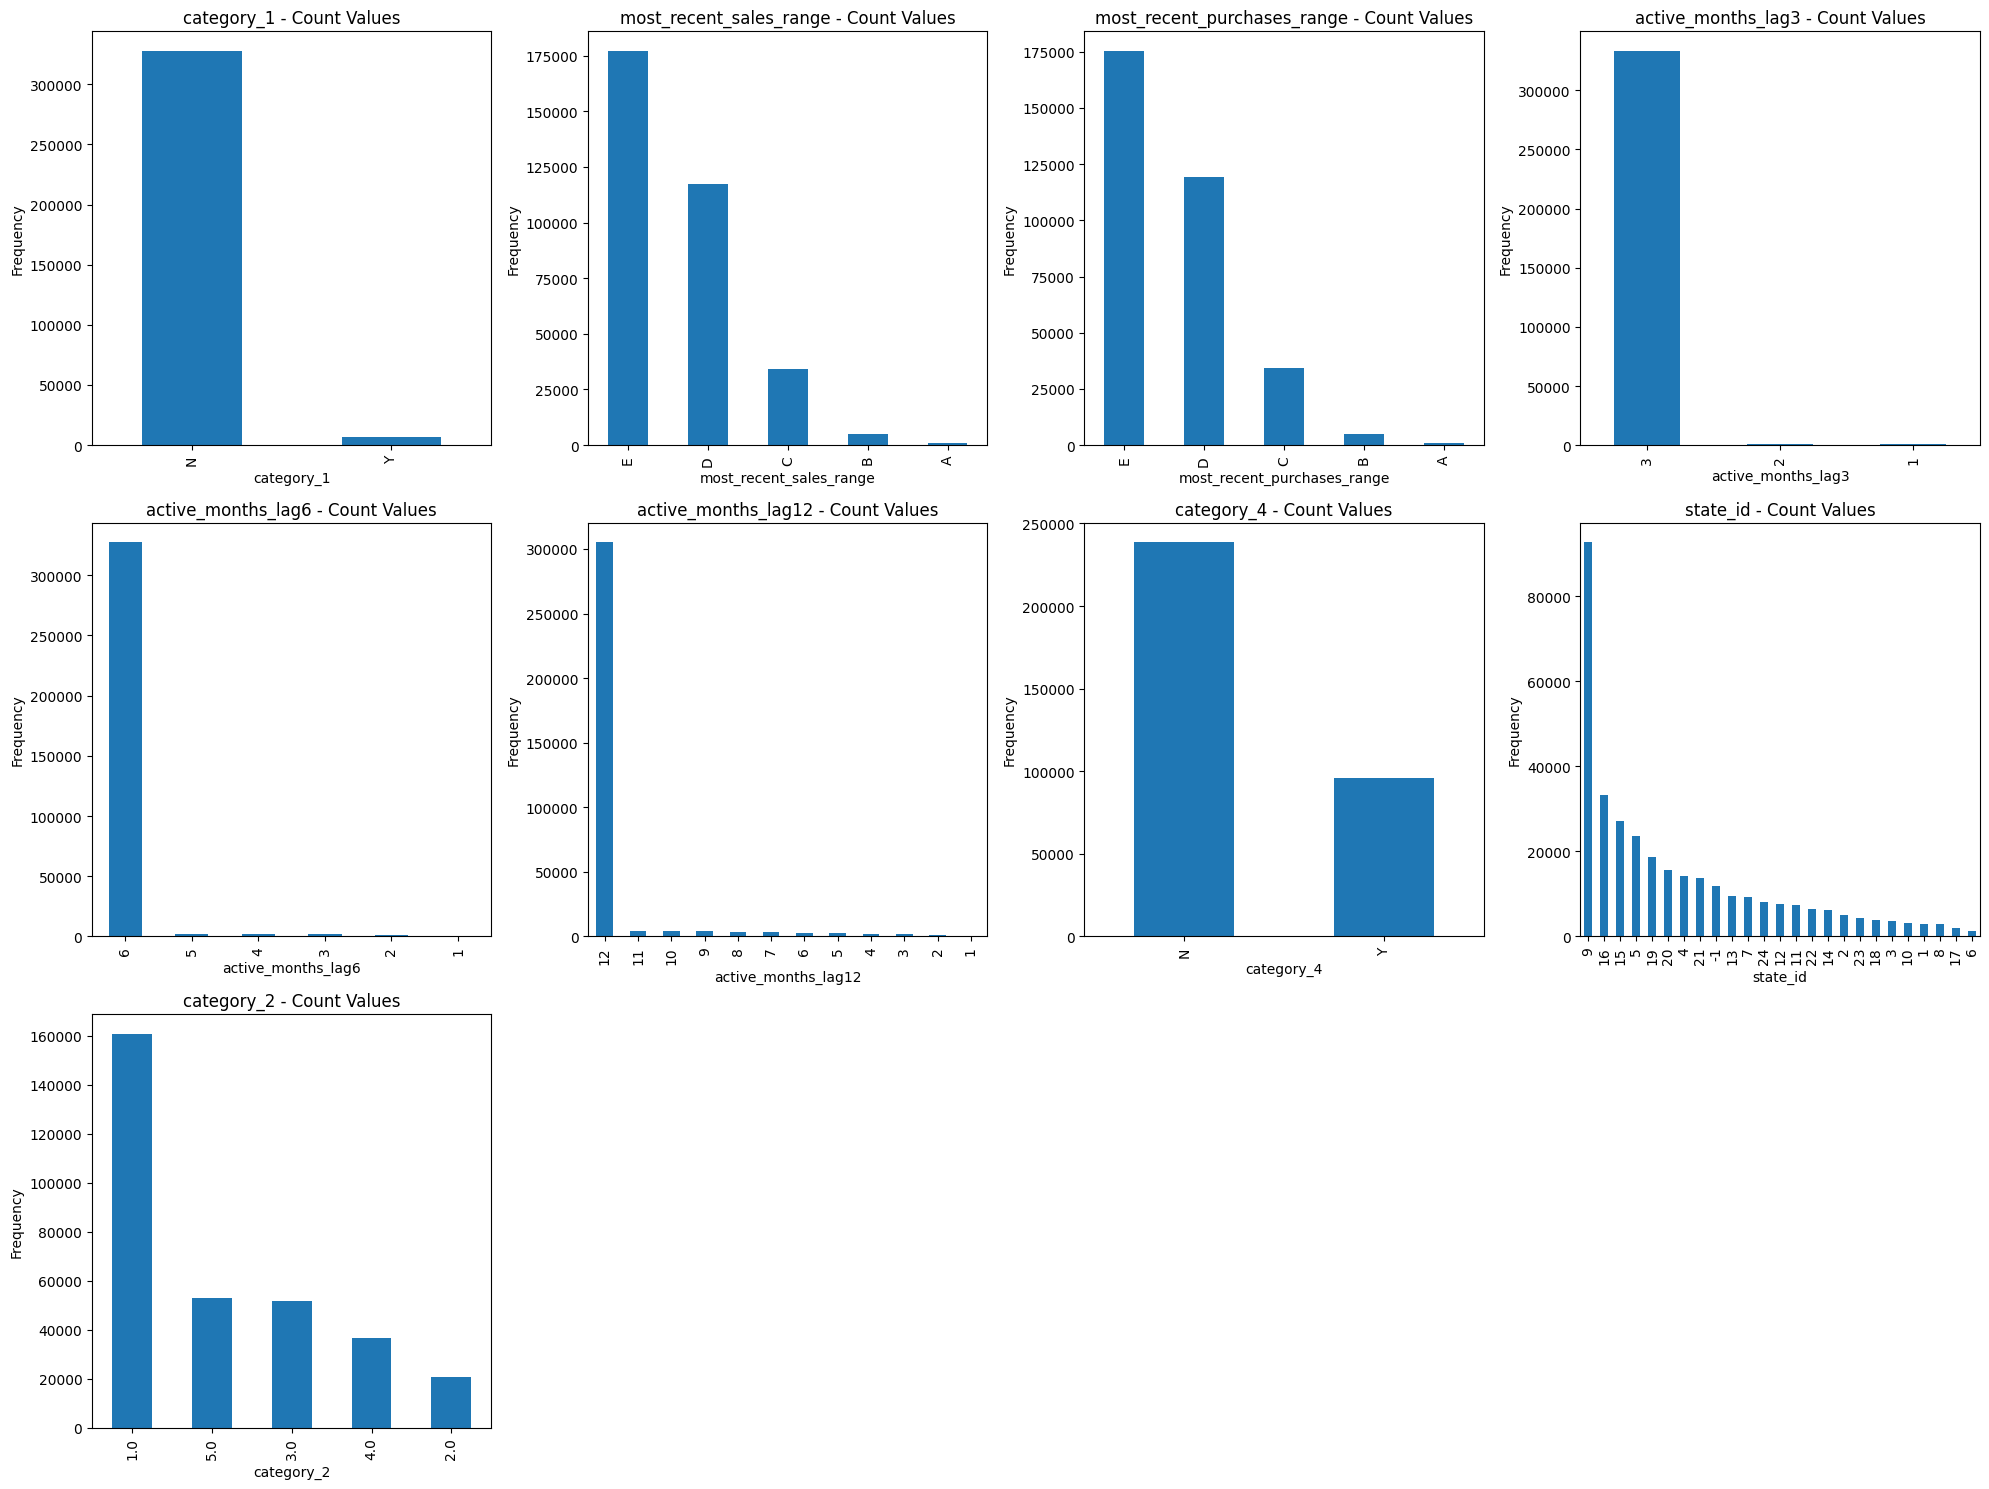


>>> 数值型字段（12 个）：['merchant_group_id', 'merchant_category_id', 'subsector_id', 'numerical_1', 'numerical_2', 'avg_sales_lag3', 'avg_purchases_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'avg_sales_lag12', 'avg_purchases_lag12', 'city_id']

字段：merchant_group_id
merchant_group_id是数值型数据，共有109391个不同的值
count    334696.000000
mean      31028.736143
std       31623.043426
min           1.000000
25%        3612.000000
50%       19900.000000
75%       51707.250000
max      112586.000000
Name: merchant_group_id, dtype: float64

字段：merchant_category_id
merchant_category_id是数值型数据，共有324个不同的值
count    334696.000000
mean        423.131663
std         252.898046
min          -1.000000
25%         222.000000
50%         373.000000
75%         683.000000
max         891.000000
Name: merchant_category_id, dtype: float64

字段：subsector_id
subsector_id是数值型数据，共有41个不同的值
count    334696.000000
mean         25.116404
std           9.807371
min          -1.000000
25%          19.000000
50%          27.000000


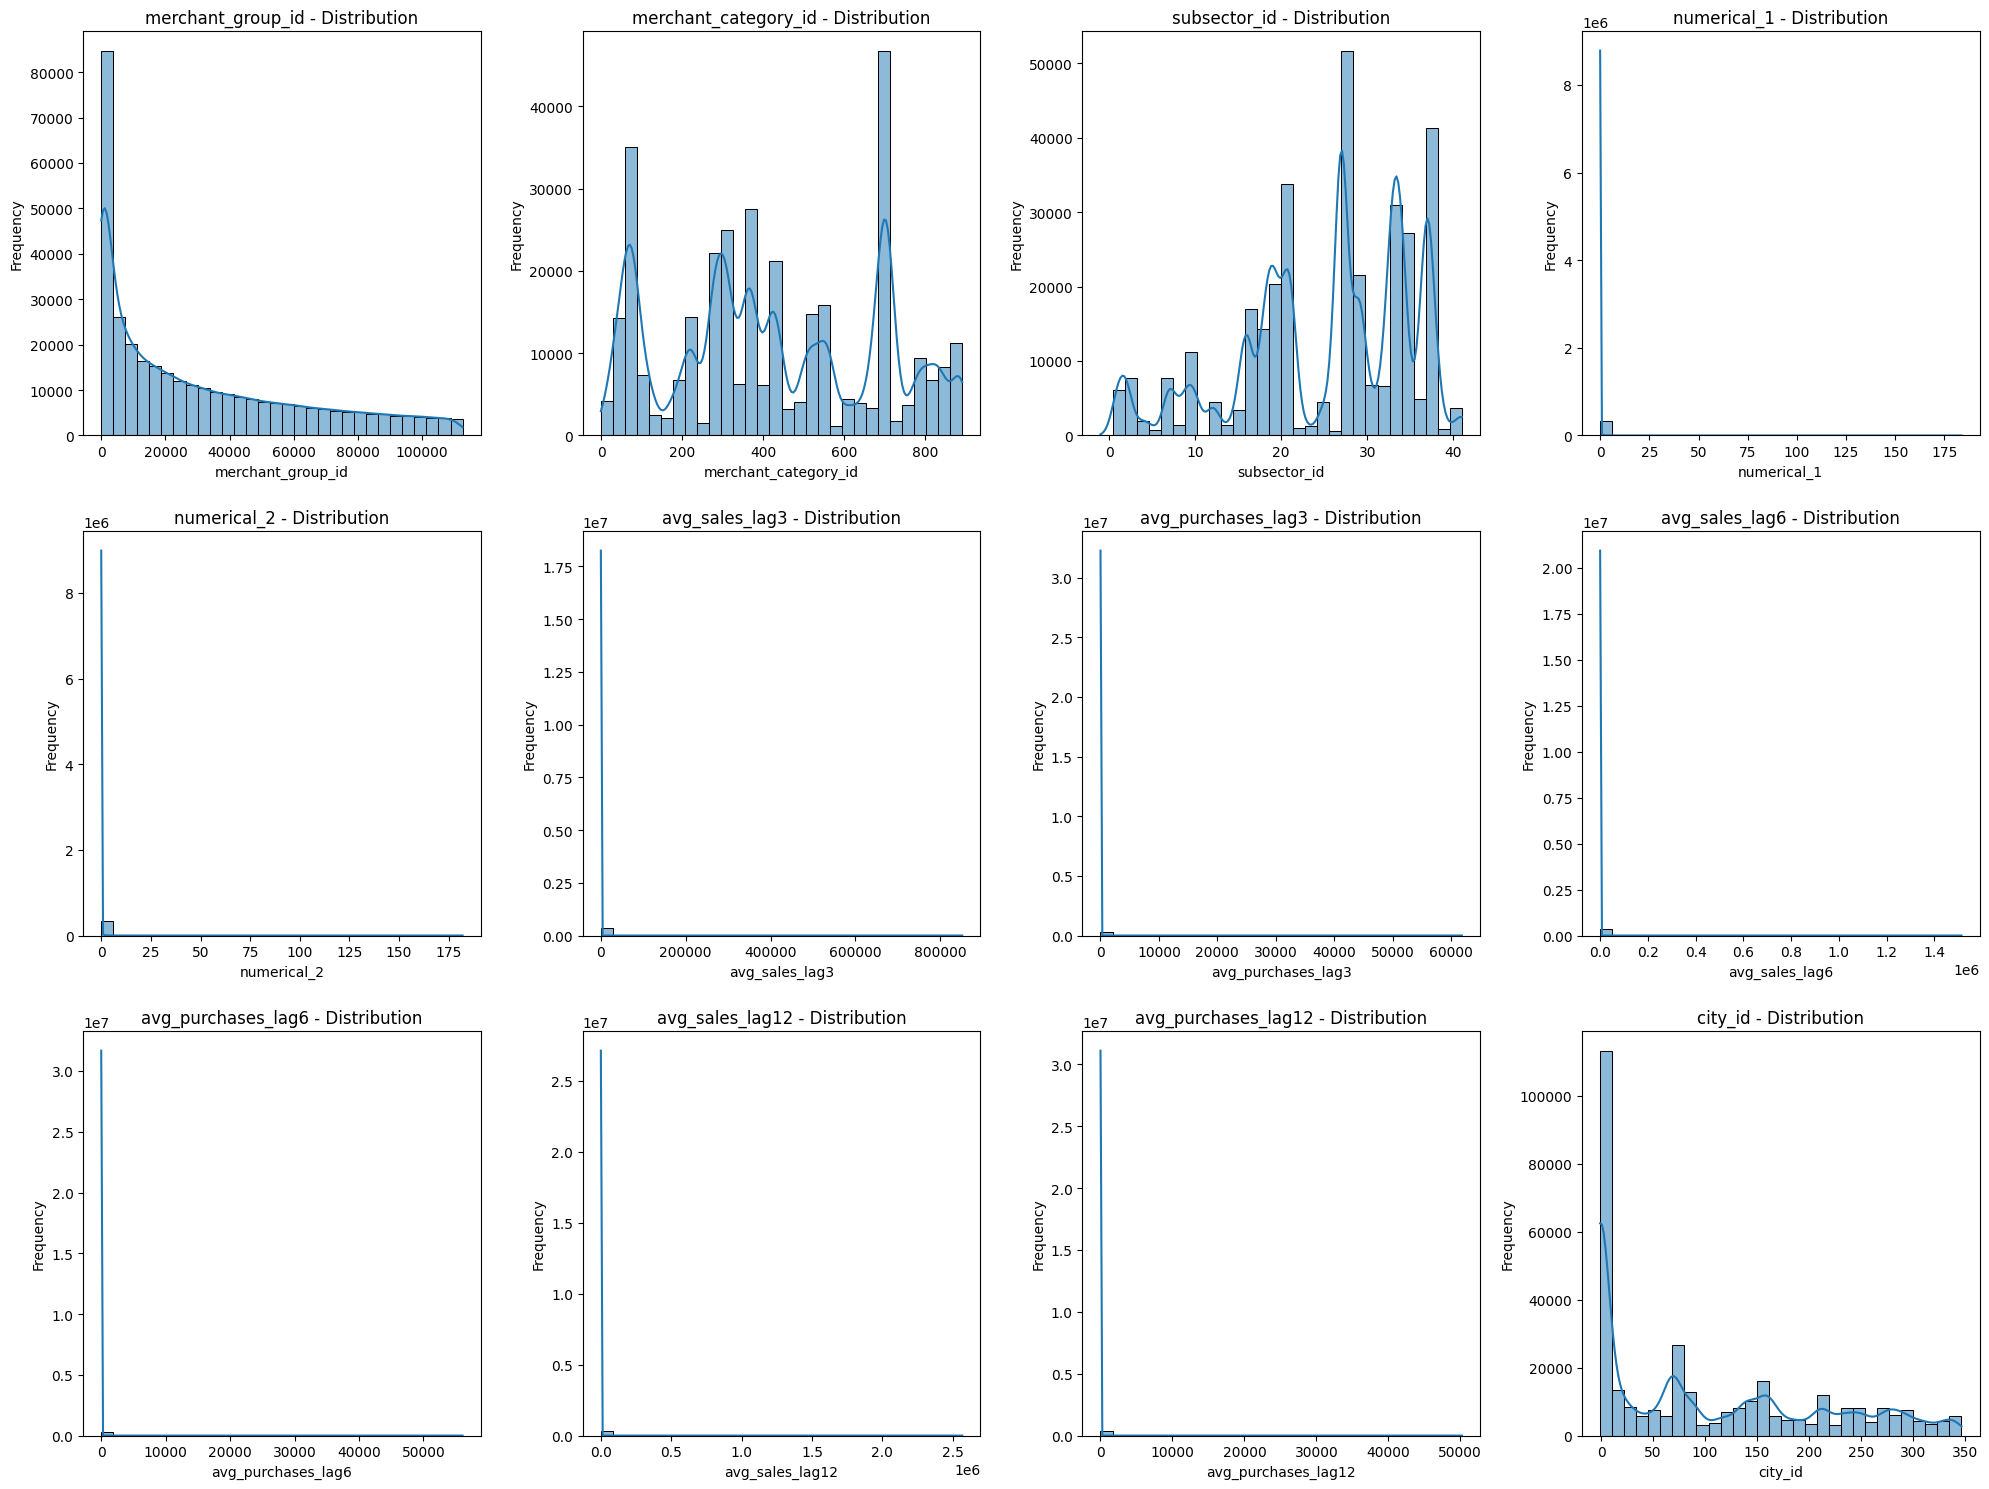

In [8]:
describe_and_visualize(merchants, "商家信息", exclude_columns=['merchant_id'])

In [3]:

historical_transactions = pd.read_csv(f"{DATA_PATH}/historical_transactions.csv")
# 要读取两分钟，红温了

In [ ]:
new_merchant_transactions = pd.read_csv(f"{DATA_PATH}/new_merchant_transactions.csv")

In [6]:
historical_transactions_desc = DescData(historical_transactions)
historical_transactions_desc_auto = historical_transactions_desc.auto_desc()
print(f"Historical transactions auto desc:\n{historical_transactions_desc_auto}")
historical_transactions_missing_info = historical_transactions_desc.desc_missing_values()
print(f"Historical transactions missing info:\n{historical_transactions_missing_info}")



数据集的形状为：(29112361, 14)
Historical transactions auto desc:
                 Feature  n_unique  缺失值占比(%)  最大类别占比(%)     type
11            category_2         5  9.112500  52.133178  float64
5             category_3         3  0.611970  52.938843   object
7            merchant_id    326311  0.475678   3.830321   object
0        authorized_flag         2  0.000000  91.354501   object
1                card_id    325540  0.000000   0.019174   object
2                city_id       308  0.000000  16.609580    int64
3             category_1         2  0.000000  92.841429   object
4           installments        15  0.000000  52.938843    int64
6   merchant_category_id       327  0.000000  19.077838    int64
8              month_lag        14  0.000000  13.249616    int64
9        purchase_amount    215014  0.000000   2.360794  float64
10         purchase_date  16395300  0.000000   0.089941   object
12              state_id        25  0.000000  36.303758    int64
13          subsector_id        


[log] -------------------- 

正在分析表格：历史交易信息
表格的形状：(29112361, 14)

>>> 类别型字段（7 个）：['authorized_flag', 'category_1', 'installments', 'category_3', 'month_lag', 'category_2', 'state_id']
字段：authorized_flag
authorized_flag是类别型数据，共有2个不同的值
authorized_flag
Y    26595452
N     2516909
Name: count, dtype: int64
字段：category_1
category_1是类别型数据，共有2个不同的值
category_1
N    27028332
Y     2084029
Name: count, dtype: int64
字段：installments
installments是类别型数据，共有15个不同的值
installments
 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: count, dtype: int64
字段：category_3
category_3是类别型数据，共有3个不同的值
category_3
A    15411747
B    11677522
C     1844933
Name: count, dtype: int64
字段：month_lag
month_lag是类别型数据，共有14个不同的值
month_lag
-2     3857276
-1     3627430
 0     3470946
-3     3095651
-4     2639805
-5     23

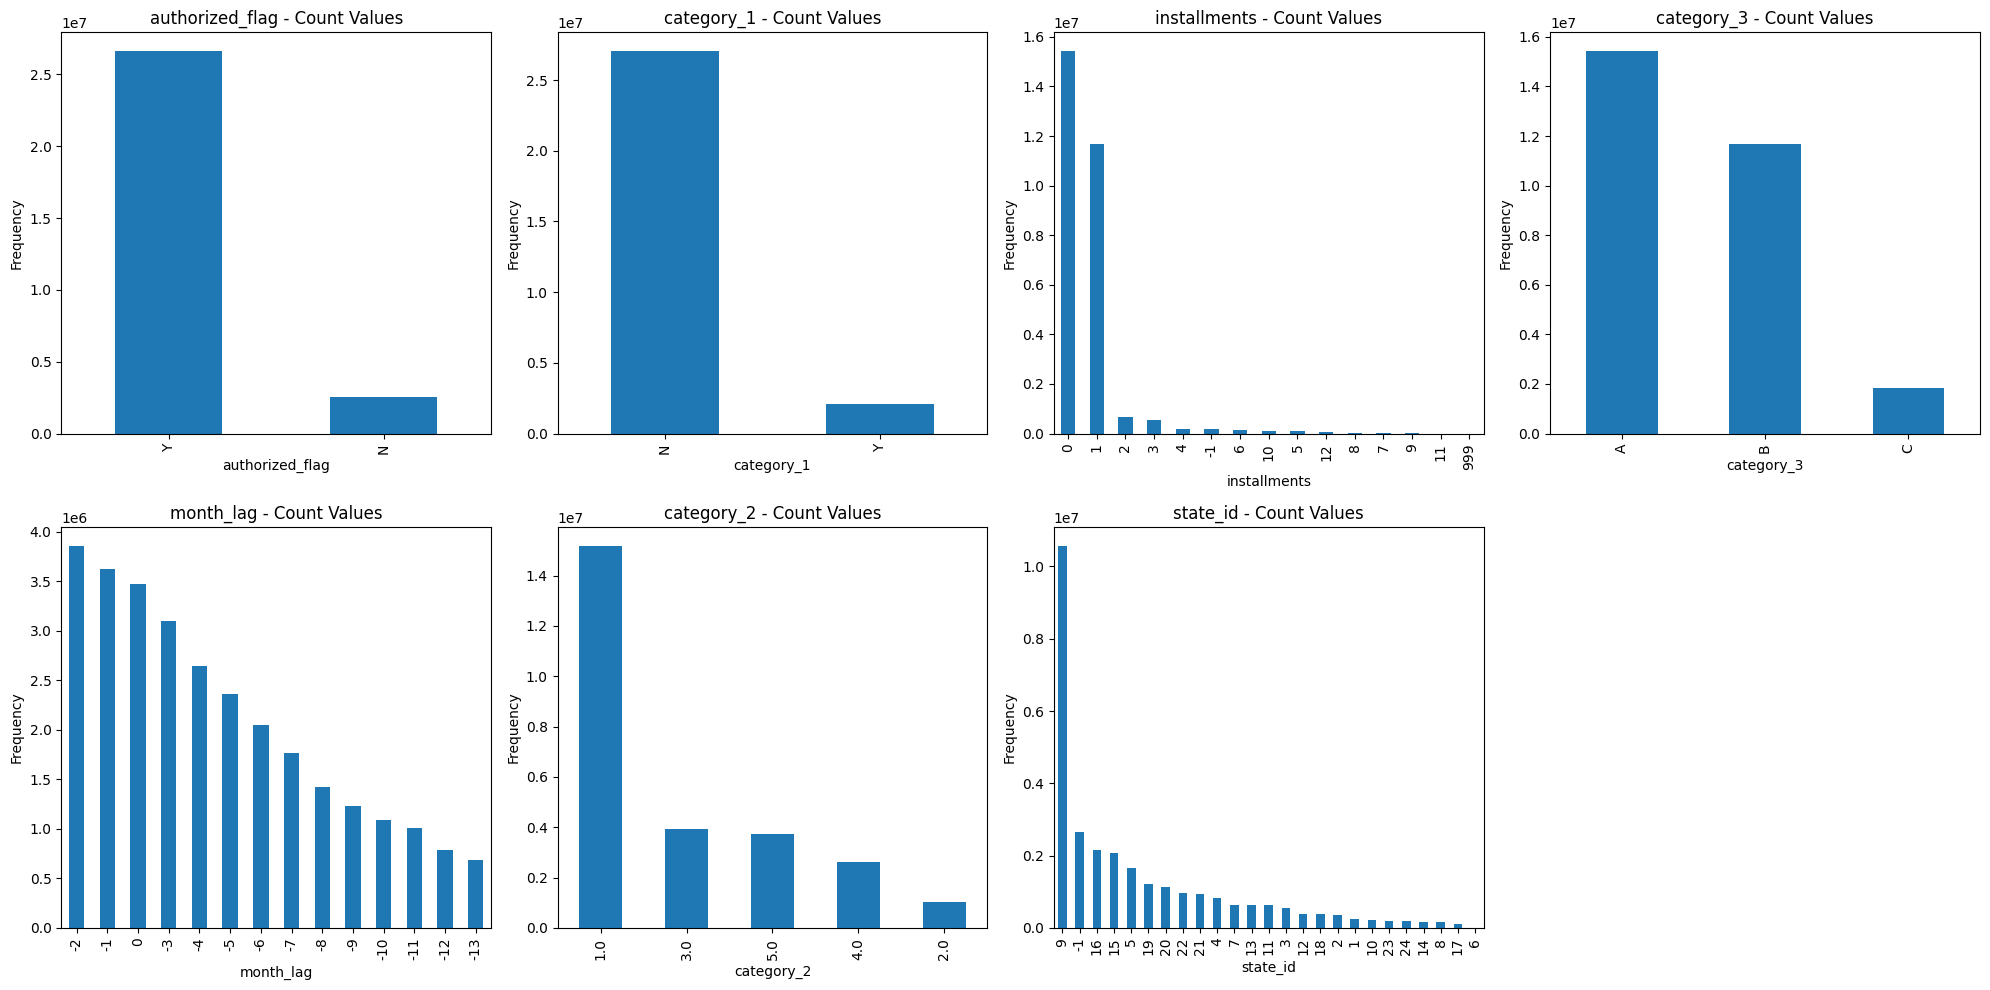


>>> 数值型字段（4 个）：['city_id', 'merchant_category_id', 'purchase_amount', 'subsector_id']

字段：city_id
city_id是数值型数据，共有308个不同的值
count    2.911236e+07
mean     1.293256e+02
std      1.042563e+02
min     -1.000000e+00
25%      5.300000e+01
50%      9.000000e+01
75%      2.120000e+02
max      3.470000e+02
Name: city_id, dtype: float64

字段：merchant_category_id
merchant_category_id是数值型数据，共有327个不同的值
count    2.911236e+07
mean     4.810130e+02
std      2.493757e+02
min     -1.000000e+00
25%      3.070000e+02
50%      4.540000e+02
75%      7.050000e+02
max      8.910000e+02
Name: merchant_category_id, dtype: float64

字段：purchase_amount
purchase_amount是数值型数据，共有215014个不同的值
count    2.911236e+07
mean     3.640090e-02
std      1.123522e+03
min     -7.469078e-01
25%     -7.203559e-01
50%     -6.883495e-01
75%     -6.032543e-01
max      6.010604e+06
Name: purchase_amount, dtype: float64

字段：subsector_id
subsector_id是数值型数据，共有41个不同的值
count    2.911236e+07
mean     2.684839e+01
std      9.692793e+00
min   

In [ ]:
describe_and_visualize(historical_transactions, "历史交易信息", exclude_columns=['card_id', 'merchant_id', 'purchase_date'])